# Emotion Detection Model
This notebook demonstrates the process of building and evaluating an emotion detection model using machine learning techniques.

## 1. Importing Libraries

In [17]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import PorterStemmer
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\udit0\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Reading Data

In [2]:
# Read in the dataset
df_train = pd.read_csv("data/train.csv")
df_val = pd.read_csv("data/validation.csv")
df_test = pd.read_csv("data/test.csv")

# Check unique labels in each dataset
print("Unique training labels:", df_train['label'].unique())
print("Unique validation labels:", df_val['label'].unique())
print("Unique test labels:", df_test['label'].unique())

Unique training labels: [0 3 2 5 4 1]
Unique validation labels: [0 2 3 1 4 5]
Unique test labels: [0 1 4 3 2 5]


## Mapping Labels

In [3]:
label_mapping = {
    0: 'sadness',
    1: 'joy',
    2: 'love',
    3: 'anger',
    4: 'fear',
    5: 'surprise'
}

for df in [df_train, df_val, df_test]:
    df['emotion'] = df['label'].map(label_mapping)

## Text Preprocessing with Stemmer

In [4]:
# Initialize the stemmer
stemmer = PorterStemmer()

# Define a function for tokenization and stemming
def stemmed_tokenizer(text):
    tokens = nltk.word_tokenize(text)
    return [stemmer.stem(token) for token in tokens]

## Vectorization

In [5]:
# Vectorize the training data
vectorizer = CountVectorizer(tokenizer=stemmed_tokenizer)
tdm_train = vectorizer.fit_transform(df_train['text'])

C:\Users\udit0\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:523: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


## Training the Logistic Regression Model

In [6]:
# Train a Logistic Regression model
log_model = LogisticRegression(max_iter=1000)
log_model.fit(tdm_train, df_train['label'])

# Validate the model
tdm_val = vectorizer.transform(df_val['text'])
y_val_pred_log = log_model.predict(tdm_val)

# Calculate and print validation accuracy
val_accuracy_log = accuracy_score(df_val['label'], y_val_pred_log)
print("Logistic Regression Validation Accuracy:", val_accuracy_log)

Logistic Regression Validation Accuracy: 0.86


## Training the Random Forest model

In [7]:
# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(tdm_train, df_train['label'])

# Validate the Random Forest model
y_val_pred_rf = rf_model.predict(tdm_val)

# Calculate and print validation accuracy
val_accuracy_rf = accuracy_score(df_val['label'], y_val_pred_rf)
print("Random Forest Validation Accuracy:", val_accuracy_rf)

Random Forest Validation Accuracy: 0.842


## Training the SVM model

In [19]:
#Train the SVM model
svm_model = LinearSVC(random_state=42)
svm_model.fit(tdm_train, df_train['label'])

# Validate the SVM model
y_val_pred_svm = svm_model.predict(tdm_val)

# Calculate and print validation accuracy
val_accuracy_svm = accuracy_score(df_val['label'], y_val_pred_svm)
print("SVM Validation Accuracy:", val_accuracy_svm)

SVM Validation Accuracy: 0.851


## Comparing Models

In [20]:
# Determine the best model based on validation accuracy
if val_accuracy_log > val_accuracy_rf and val_accuracy_log > val_accuracy_svm:
    best_model = log_model
    best_model_name = "Logistic Regression"
    best_accuracy = val_accuracy_log
elif val_accuracy_rf > val_accuracy_log and val_accuracy_rf > val_accuracy_svm:
    best_model = rf_model
    best_model_name = "Random Forest"
    best_accuracy = val_accuracy_rf
else:
    best_model = svm_model
    best_model_name = "SVM"
    best_accuracy = val_accuracy_svm

print(f"The best model is {best_model_name} with accuracy: {best_accuracy}")

The best model is Logistic Regression with accuracy: 0.86


## Testing the Best Model

In [9]:
# Prepare the test data and make predictions
tdm_test = vectorizer.transform(df_test['text'])
y_test_pred = best_model.predict(tdm_test)

# Calculate and print test accuracy
test_accuracy = accuracy_score(df_test['label'], y_test_pred)
print("Test Accuracy of the best model:", test_accuracy)

Test Accuracy of the best model: 0.855


## Performance Evaluation

In [10]:
# Print classification report and confusion matrix for the test dataset
print("\nClassification Report for the Test Dataset:")
print(classification_report(df_test['label'], y_test_pred))
print("\nConfusion Matrix for the Test Dataset:")
print(confusion_matrix(df_test['label'], y_test_pred))


Classification Report for the Test Dataset:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       581
           1       0.88      0.91      0.89       695
           2       0.72      0.64      0.68       159
           3       0.87      0.84      0.85       275
           4       0.82      0.82      0.82       224
           5       0.66      0.68      0.67        66

    accuracy                           0.85      2000
   macro avg       0.81      0.80      0.80      2000
weighted avg       0.85      0.85      0.85      2000


Confusion Matrix for the Test Dataset:
[[518  25   7  17  12   2]
 [ 14 632  29   8   3   9]
 [  7  42 101   3   5   1]
 [ 24   9   2 231   8   1]
 [ 18   5   1   7 183  10]
 [  2   8   0   0  11  45]]


## Adding Predictions to the Test Dataset

In [11]:
# Add predicted emotions to the test dataframe
df_test['predicted_emotion'] = [
    label_mapping[label] if label in label_mapping else 'unknown'
    for label in y_test_pred
]

## Displaying Predictions

In [12]:
# Display the predictions in the test dataset
print("\nTest Dataset Predictions:")
print(df_test[['text', 'emotion', 'predicted_emotion']].head())


Test Dataset Predictions:
                                                text  emotion  \
0  im feeling rather rotten so im not very ambiti...  sadness   
1          im updating my blog because i feel shitty  sadness   
2  i never make her separate from me because i do...  sadness   
3  i left with my bouquet of red and yellow tulip...      joy   
4    i was feeling a little vain when i did this one  sadness   

  predicted_emotion  
0           sadness  
1           sadness  
2           sadness  
3               joy  
4           sadness  


## Predicting Emotion Function 

In [13]:
def predict_emotion(sentence, model, vectorizer, label_mapping):
    sentence_tdm = vectorizer.transform([sentence])
    probabilities = model.predict_proba(sentence_tdm)[0]
    emotions = [label_mapping[i] for i in range(len(probabilities))]
    
    # Plot the predicted probabilities
    plt.figure(figsize=(8, 4))
    sns.barplot(x=emotions, y=probabilities)
    plt.title('Emotion Prediction')
    plt.ylabel('Probability')
    plt.show()


## Using the Predict Emotion Function

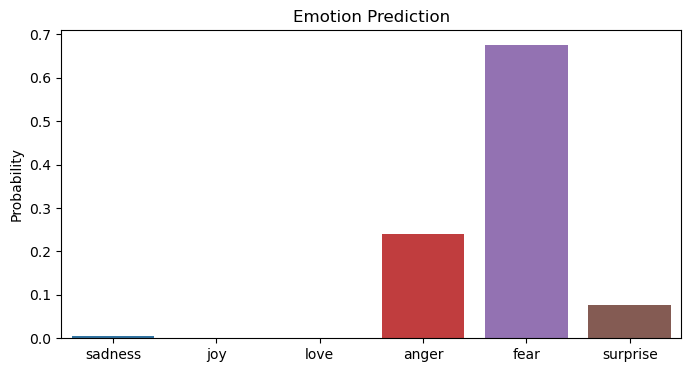

Please enter a sentence to predict emotion: I heard strange noises outside last night, and I couldn't sleep at all. My heart was racing, and I kept imagining all sorts of dangers lurking in the dark.


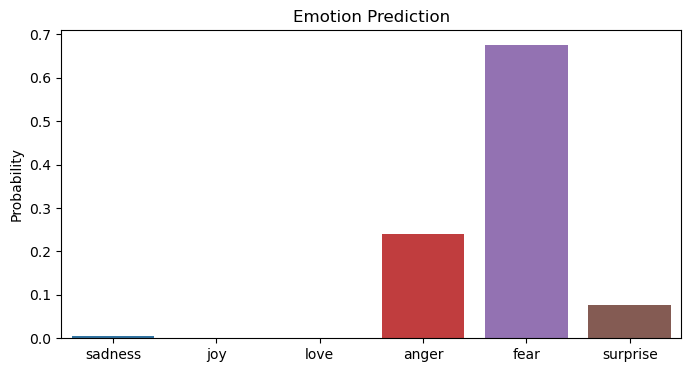

In [14]:
# Predict emotion for a specific sentence
predict_emotion("I heard strange noises outside last night, and I couldn't sleep at all. My heart was racing, and I kept imagining all sorts of dangers lurking in the dark.", best_model, vectorizer, label_mapping)

# Function for user input prediction
def user_input_prediction(model, vectorizer, label_mapping):
    try:
        sentence = input("Please enter a sentence to predict emotion: ")
        predict_emotion(sentence, model, vectorizer, label_mapping)
    except Exception as e:
        print(f"An error occurred: {e}")

# Call the user input function
user_input_prediction(best_model, vectorizer, label_mapping)
